<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [ ]:
import pandas as pd

df = pd.read_csv('df.csv', encoding = 'cp949')
df.isnull().values.any()
df.head()

,측정일시,측정소명,오존(ppm)
0,2.020030e+11,송파구,0.020
1,2.020030e+11,송파구,0.021
2,2.020030e+11,송파구,0.025
3,2.020030e+11,송파구,0.032
4,2.020030e+11,송파구,0.034


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [ ]:
import pandas 
import random
filename = 'df.csv'
n = sum(1 for line in open(filename, encoding = 'cp949')) - 1
sa1 = 20 # sample size
sample = sorted(random.sample(range(1, n+1),n-sa1))
s1 = pandas.read_csv(filename, skiprows=sample, encoding = 'cp949')

In [ ]:
filename = 'df.csv'
n = sum(1 for line in open(filename, encoding = 'cp949')) - 1
sa2 = 200 # sample size
sample = sorted(random.sample(range(1, n+1),n-sa2))
s2 = pandas.read_csv(filename, skiprows=sample, encoding = 'cp949')

In [ ]:
# 위 두 방법의 오류는 random state가 포함 되지 않아 sampling의 오류가 생김

In [ ]:
s1 = df.sample(20, random_state=42)
s2 = df.sample(200, random_state=42)

In [ ]:
s1

,측정일시,측정소명,오존(ppm)
609,2.020030e+11,송파구,0.021
539,2.020030e+11,송파구,0.020
694,2.020030e+11,송파구,0.002
350,2.020030e+11,송파구,0.009
174,2.020030e+11,송파구,0.044
81,2.020030e+11,송파구,0.037
355,2.020030e+11,송파구,0.021
424,2.020030e+11,송파구,0.019
523,2.020030e+11,송파구,0.013
617,2.020030e+11,송파구,0.002


In [ ]:
df.shape

(744, 3)

In [ ]:
s1.loc[603, '오존(ppm)']

0.002

In [ ]:
s2.loc[453, '오존(ppm)']

0.034

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [ ]:
s1_mean = s1['오존(ppm)'].mean()
s1_mean

0.021750000000000002

In [ ]:
s2_mean = s2['오존(ppm)'].mean()
s2_mean

0.02291999999999995

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [ ]:
from scipy.stats import t
from scipy import stats
import numpy as np

#날짜 값과 섞이지 않게 오존 ppm으로 지정
sa1 = s1['오존(ppm)']
sa2 = s2['오존(ppm)']

#confidence interval 함수
def confidence_interval(sa, confidence=0.95):
    n = len(sa)
    dof = n-1
    mean = np.mean(sa)
    sa_std = np.std(sa, ddof=1)
    std_err = sa_std / n ** 0.5 
    confidence = t.interval(.95, dof, loc = mean, scale = std_err)
    return confidence

#함수에 따라 C1, C2 지정
CI1 = confidence_interval(sa1)
CI2 = confidence_interval(sa2)

In [ ]:
CI1

(0.015060460813957323, 0.02843953918604268)

In [ ]:
CI2

(0.021006515262626202, 0.0248334847373737)

In [ ]:
CI1[0]

0.015060460813957323

In [ ]:
CI2[1]

0.0248334847373737

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






In [ ]:
pop_mean = df['오존(ppm)'].mean()
pop_mean

0.023588709677419318

In [ ]:
def error(sa):
    n = len(sa)
    dof = n-1
    mean = np.mean(sa)
    sa_std = np.std(sa, ddof = 1)
    std_err = sa_std / n ** 0.5

    return std_err

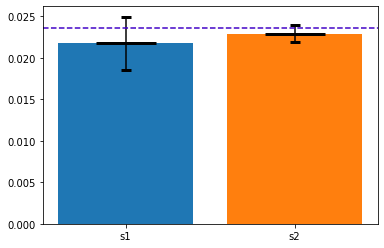

In [ ]:
#참고 사이트: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

data = ['s1','s2']
x = np.arange(len(data))
fig, ax = plt.subplots()

#ax.bar 지정 
ax.bar(0, s1_mean)
ax.bar(1, s2_mean)

#pop_mean에 따른 라인 생성
ax.axhline(y=pop_mean, color='#4000c7', linestyle='--')

#표준 오차범위 지정
ax.errorbar(0, s1_mean, yerr=error(s1['오존(ppm)']), fmt = '_', capsize=5, color='k',ms=60,mew=3)
ax.errorbar(1, s2_mean, yerr=error(s2['오존(ppm)']), fmt = '_', capsize=5, color='k',ms=60,mew=3)
#fmt가 오차범위 중간의 - 표시를 나타냄 (ms는 이것의 길이)
#capsize는 가장 위아래 - 길이
#mew = markerededge width
#ms = markersize
#fmt = str, optional

ax.set_xticks(x)
ax.set_xticklabels(data)

plt.show() # 차트 출력

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0, flags=flags)


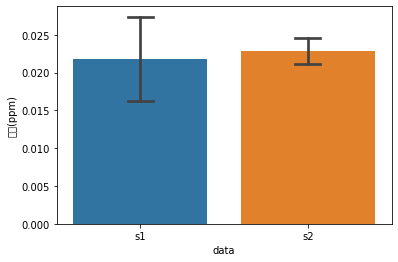

In [ ]:
import seaborn as sns

#https://seaborn.pydata.org/generated/seaborn.barplot.html

s1['data'] = 's1'
s2['data'] = 's2'

graph = pd.concat([s1, s2])

ax = sns.barplot(x='data', y='오존(ppm)', data=graph, capsize=.15)

print(ex2)

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한가설을 표현하는 코드를 작성하세요.

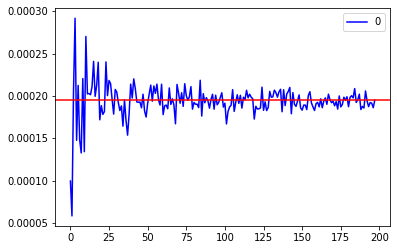

In [ ]:
# 큰 수의 법칙
oz = np.array(df['오존(ppm)'])
oz_var = oz.var()


dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(oz, i)
  dat.append(s.var())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = 'b')
 .axhline(y = oz.var(), color = 'r')
 );

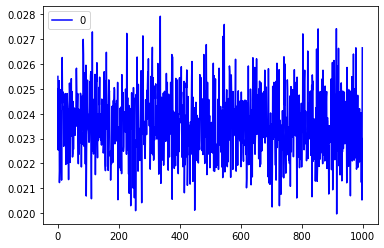

In [ ]:
# 중심극한 가설
sample_means = []

for i in range(1000):
  oz= df.sample(100)
  sample_means.append(oz['오존(ppm)'].mean())

pd.DataFrame(sample_means).plot(color = 'b');

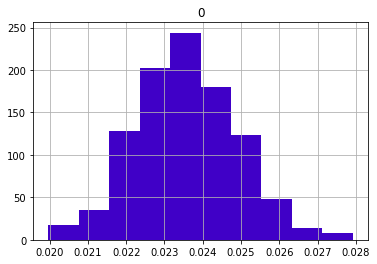

In [ ]:
pd.DataFrame(sample_means).hist(color = '#4000c7');